In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import Model
from tensorflow.keras.datasets.fashion_mnist import load_data
from algorithms.ml.utils.utils import one_hot_encode
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [4]:
x_train = train_images / 255.0
x_test = test_images / 255.0

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
y_train, _ = one_hot_encode(train_labels, True)

In [10]:
y_train.shape

(60000, 10)

In [11]:
X = x_train[:, :, :, np.newaxis]
X_test = x_test[:, :, :, np.newaxis]

In [12]:
X.shape

(60000, 28, 28, 1)

In [13]:
X_test.shape

(10000, 28, 28, 1)

In [14]:
test_labels.shape

(10000,)

In [15]:
layer_size = 3
conv_input_shape = X.shape
print(conv_input_shape)
n_filters = [32, 64, 128]
fc_dropout_rates = [1.0, 1.0]
conv_dropout_rates = [1.0, 1.0, 1.0]
conv_activations = ['relu', 'relu', 'relu']
poolings = ['max', 'max', 'max']
fc_layers = [128, 64]
output_labels = ['mnist']
y = {'mnist': y_train}
output_activations = {'mnist':'softmax'}
fc_activations = ['relu', 'relu']
output_heads = [10]
pool_sizes = [(3, 3), (3, 3), (3, 3)]
pool_strides = [(2, 2), (2, 2), (2, 2)]
strides = [(1, 1), (1, 1), (1, 1)]
filter_sizes = [(3, 3), (3, 3), (3, 3)]
pads = ['same', 'same', 'same']
conv_operations = [None, None, None]
transpose_output_padding = [0, 0, 0]

(60000, 28, 28, 1)


In [16]:
model = Model(conv_input_shape, layer_size, conv_activations, fc_layers, 
                 fc_activations, n_filters, filter_sizes,
              poolings, pool_sizes, strides, pads,
              fc_dropout_rates=fc_dropout_rates, 
              conv_dropout_rates=conv_dropout_rates, pool_strides=pool_strides, 
              output_heads=output_heads,output_labels=output_labels,
              output_activations=output_activations,conv_operations=conv_operations, 
              transpose_output_padding=transpose_output_padding)

Layers   ............... Trainable Params
Conv2D_1 ............... 320
Conv2D_2 ............... 18496
Conv2D_3 ............... 73856
Total    ............... 92672
Memory   ............... 741376 bytes (724 KB) (0.707 MB)


In [17]:
learning_rate = 1e-3
decay=False
normalized = False
bias = False
batch_size = 1000
optimizer = 'adam'

In [18]:
model.fit(X, y,
          learning_rate=learning_rate, epochs=15,
          normalized=normalized,
            optimizer=optimizer, 
          decay=decay, bias=bias,
          batch_size=batch_size, 
          verbose=True)

Layers ............... Trainable Params
Dense1 ............... 262272
Dense2 ............... 8256
Dense3 ............... 650
Total  ............... 271178
Memory ............... 2169424 bytes (2118 KB) (2.068 MB)
Epoch  1/15 Loss: 2.96852247   
Epoch  2/15 Loss: 0.86880875   
Epoch  3/15 Loss: 0.56534289   
Epoch  4/15 Loss: 0.44793346   
Epoch  5/15 Loss: 0.38865456   
Epoch  6/15 Loss: 0.33737875   
Epoch  7/15 Loss: 0.27769149   
Epoch  8/15 Loss: 0.25405167   
Epoch  9/15 Loss: 0.23913666   
Epoch 10/15 Loss: 0.21818825   
Epoch 11/15 Loss: 0.24845900   
Epoch 12/15 Loss: 0.20941250   
Epoch 13/15 Loss: 0.20381308   
Epoch 14/15 Loss: 0.18545797   
Epoch 15/15 Loss: 0.20309349   


In [19]:
model.conv_A_shapes

{'A0': (1000, 28, 28, 1),
 'A1': (1000, 14, 14, 32),
 'A2': (1000, 7, 7, 64),
 'A3': (1000, 4, 4, 128)}

In [20]:
model.fc_A_shapes

{'A0': (1000, 2048),
 'A1': (1000, 128),
 'A2': (1000, 64),
 'A_mnist': (1000, 10)}

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
test_predictions = model.predict(X_test, batch_size)

In [23]:
test_predictions = test_predictions['mnist']

In [24]:
test_predictions.shape

(10000, 10)

In [25]:
test_predictions = np.argmax(test_predictions, axis=1)

In [26]:
accuracy_score(test_labels, test_predictions)

0.896

In [27]:
costs = np.array(model.costs)
costs.shape

(165,)

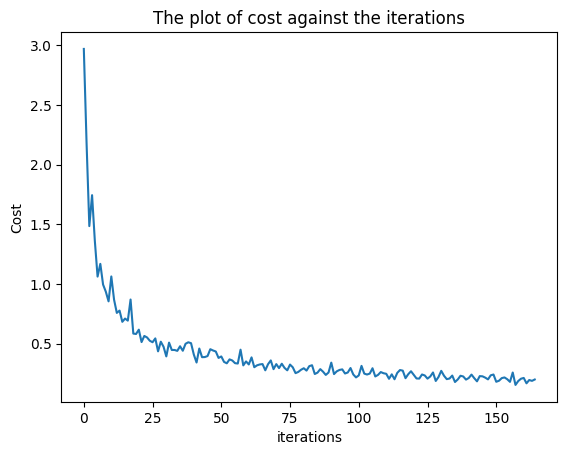

In [28]:
plt.plot(np.arange(len(model.iterations)), costs)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();

In [51]:
train_predictions = model.predict(X, batch_size)

In [52]:
train_pred = train_predictions['mnist']

In [53]:
train_pred.shape

(60000, 10)

In [54]:
train_pred = np.argmax(train_pred, axis=1)

In [55]:
accuracy_score(train_labels, train_pred)

0.9181833333333334

In [39]:
model.save('conv_fashion_mnist_model.pkl')

Model saved to conv_fashion_mnist_model.pkl


In [40]:
loaded_model = model.load('conv_fashion_mnist_model.pkl')

Model loaded from conv_fashion_mnist_model.pkl


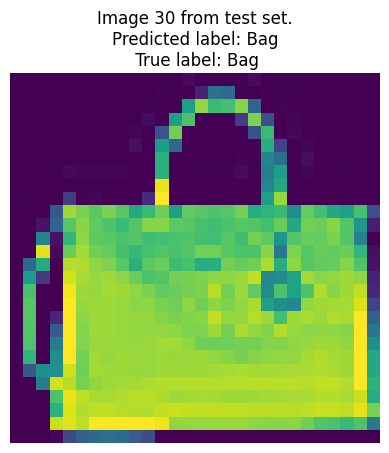

In [34]:
index = 30
image = test_images[index]
img = image[np.newaxis, :, :, np.newaxis]
img_pred = model.predict(img, -1)
img_pred = img_pred['mnist']
img_pred = np.argmax(img_pred, axis=1).squeeze()
plt.imshow(image)
plt.title(f'Image {index} from test set.\nPredicted label: {class_names[img_pred]}\n True label: {class_names[test_labels[index]]}')
plt.axis('off')
plt.show();

In [35]:
len(test_labels[test_predictions == test_labels])

8960

In [36]:
len(test_labels[test_predictions != test_labels])

1040

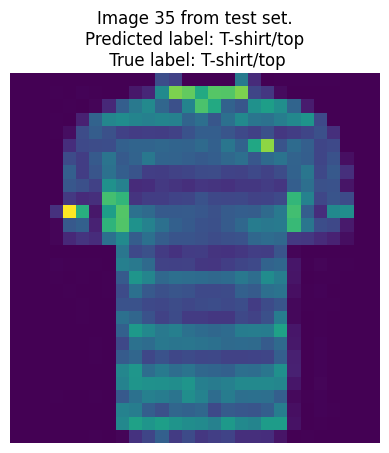

In [41]:
index = 35
image = test_images[index]
img = image[np.newaxis, :, :, np.newaxis]
img_pred = loaded_model.predict(img, -1)
img_pred = img_pred['mnist']
img_pred = np.argmax(img_pred, axis=1).squeeze()
plt.imshow(image)
plt.title(f'Image {index} from test set.\nPredicted label: {class_names[img_pred]}\n True label: {class_names[test_labels[index]]}')
plt.axis('off')
plt.show();